# Preparation

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('hr.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.shape

(14999, 10)

Just under 15K observations over 10 columns

In [6]:
#Check for missing data-values
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

Arguably, this is a rarity but it is a clean dataset containing no missing values!

In [8]:
#Rename column names 
df = df.rename(columns = {
    
    'satisfaction_level':'Satisfaction',
    'last_evaluation':'Evaluation',
    'number_project' : 'ProjectCount',
    'average_montly_hours':'AvgMonthlyHours',
    'time_spend_company':'Tenure',
    'promotion_last_5years':'Promotion',
    'sales':'Department',
    'salary':'Salary',
    'left':'Turnover'
    
})

In [9]:
df.head()

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,Tenure,Work_accident,Turnover,Promotion,Department,Salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
#Breakdown of Summary Statistics

df.describe()

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,Tenure,Work_accident,Turnover,Promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Exploration

# Context

Dataset contains; 1) roughly 15K employee observations of 10 parameters; 
2) firm's turnover rate near 24% (23.8%, in America, around 22% is considered average); 
3) mean employee satisfaction if 0.612

In [11]:
#Check column for data-type(s)

df.dtypes

Satisfaction       float64
Evaluation         float64
ProjectCount         int64
AvgMonthlyHours      int64
Tenure               int64
Work_accident        int64
Turnover             int64
Promotion            int64
Department          object
Salary              object
dtype: object

In [12]:
#Confirm turn-over rate

turnover_rate = df.Turnover.value_counts(normalize=True)
turnover_rate

#76% remained, 24% attrition

0    0.761917
1    0.238083
Name: Turnover, dtype: float64

In [13]:
turnover_summary = df.groupby('Turnover')
turnover_summary.mean()

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,Tenure,Work_accident,Promotion
Turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Correlation(s)

In [14]:
corr = df.corr()
corr

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,Tenure,Work_accident,Turnover,Promotion
Satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
Evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
ProjectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
AvgMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
Tenure,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
Turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
Promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

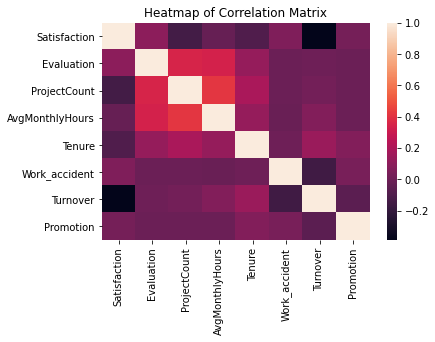

In [15]:
#Heatmap

sns.heatmap(corr)
plt.title('Heatmap of Correlation Matrix')